In [19]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import get_data

In [20]:
df = pd.read_sql_query('SELECT datadate,gvkey,tic,cusip,xrdq,xoprq FROM quarterly',get_data.engine)

#xrdq: Research and Development Expense
#xoprq: Operating Expense- Total 
df.head()
# Debt to equity ratio = dlttq / seqq

,datadate,gvkey,tic,cusip,xrdq,xoprq
0,2013-06-30,028967,QCRH,74727A104,NaN,16.725
1,2013-09-30,028967,QCRH,74727A104,NaN,17.770
2,2013-12-31,028967,QCRH,74727A104,NaN,17.848
3,2014-03-31,028967,QCRH,74727A104,NaN,17.192
4,2014-06-30,028967,QCRH,74727A104,NaN,16.887


In [21]:
df = df.dropna(axis = 0)

In [41]:
df['rd_opex'] = (df['xrdq'])/df['xoprq']

In [51]:
#getting rid of outliers
df = df[(df['rd_opex'] > 0) & (df['rd_opex'] < 1)]
print(min(df['rd_opex']), max(df['rd_opex']))

6.545202806885049e-05 0.9994227994227994


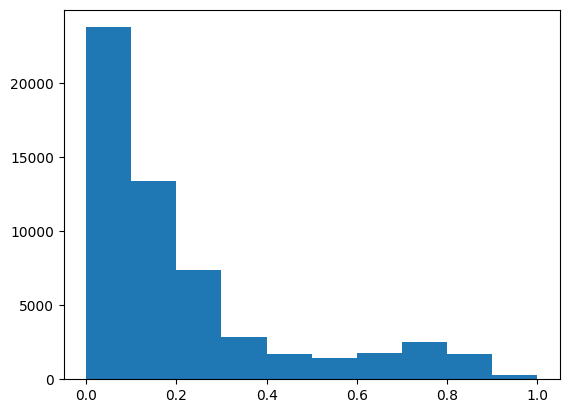

In [53]:
plt.hist(df['rd_opex']);